# Pulling one variable from local file

In [28]:
import cfgrib
import xarray as xr
import pygrib


location = 'E:/Research_Computing/NOA_CFS_data_AWS/'
path = 'cfs.20181031/00/6hrly_grib_01/'
file = 'flxf2018103100.01.2018103100.grb2'
# data = location+path+file
data =file

grbs = pygrib.open(data)
grbs.seek(0)
for grb in grbs:
    print(grb)


1:Momentum flux, u component:N m**-2 (instant):regular_gg:surface:level 0:fcst time 0 hrs:from 201810310000
2:Momentum flux, v component:N m**-2 (instant):regular_gg:surface:level 0:fcst time 0 hrs:from 201810310000
3:Sensible heat net flux:W m**-2 (instant):regular_gg:surface:level 0:fcst time 0 hrs:from 201810310000
4:Latent heat net flux:W m**-2 (instant):regular_gg:surface:level 0:fcst time 0 hrs:from 201810310000
5:Temperature:K (instant):regular_gg:surface:level 0:fcst time 0 hrs:from 201810310000
6:Volumetric soil moisture content:Proportion (instant):regular_gg:depthBelowLandLayer:levels 0.0-0.1 m:fcst time 0 hrs:from 201810310000
7:Volumetric soil moisture content:Proportion (instant):regular_gg:depthBelowLandLayer:levels 0.1-0.4 m:fcst time 0 hrs:from 201810310000
8:Temperature:K (instant):regular_gg:depthBelowLandLayer:levels 0.0-0.1 m:fcst time 0 hrs:from 201810310000
9:Temperature:K (instant):regular_gg:depthBelowLandLayer:levels 0.1-0.4 m:fcst time 0 hrs:from 201810310000

# Looking at one type of level

In [30]:
ds = cfgrib.open_dataset(data , # link to the data we are opening from
                                        engine = 'cfgrib', # Engine We are Using (cfgrib)
                                        filter_by_keys={'typeOfLevel': 'surface'},
                                        )
ds.t


<xarray.DataArray 't' (latitude: 190, longitude: 384)>
[72960 values with dtype=float32]
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 89.28 88.34 87.4 ... -87.4 -88.34 -89.28
  * longitude   (longitude) float64 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
    valid_time  datetime64[ns] ...
Attributes: (12/25)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      72960
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

# Plotting a given variable

Snow cover


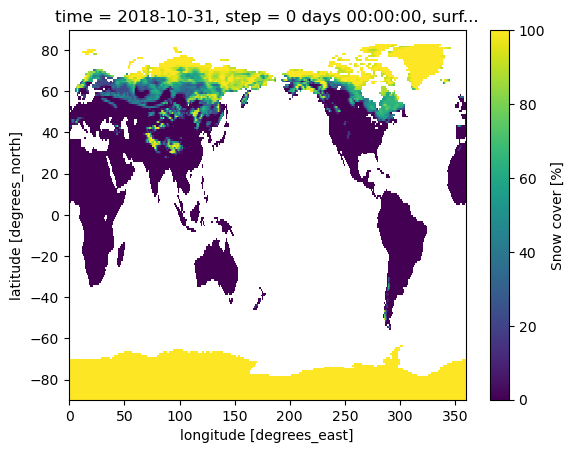

In [7]:
f = ds.snowc
f.plot()
print(f.long_name)

# Pulling all variables from a given file

# CFGRIB Open dataset

In [26]:
# from cfgrib import xarray_store
ds = cfgrib.dataset(data)

TypeError: 'module' object is not callable

In [27]:
ds.t


<xarray.DataArray 't' (latitude: 190, longitude: 384)>
[72960 values with dtype=float32]
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    surface     float64 ...
  * latitude    (latitude) float64 89.28 88.34 87.4 ... -87.4 -88.34 -89.28
  * longitude   (longitude) float64 0.0 0.9375 1.875 2.812 ... 357.2 358.1 359.1
    valid_time  datetime64[ns] ...
Attributes: (12/25)
    GRIB_paramId:                             130
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      72960
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_name:                                Temperature
    GRIB_shortName:                           t
    GRIB_units:                               K
    long_name:                                Temperature
    units:                                    K
    standard_name:                            air_temperature

In [ ]:
ds.n


ValueError: Dimensions {'al', 'sde', 'dlwrf', 'pevpr', 'uswrf', 'ulwrf', 'time', 'icetk', 'crain', 'vddsf', 'nbdsf', 'surface', 'dswrf', 'sr', 'valid_time', 'sp', 'ssrun', 'srweq', 'vflx', 'nddsf', 'fco2rec', 'csulf', 'cprat', 'sdwe', 'evcw', 'snohf', 'step', 'gflux', 'u-gwd', 'fricv', 'csusf', 't', 'lsm', 'snowc', 'shtfl', 'orog', 'watr', 'fco2nee', 'gppbfas', 'duvb', 'acond', 'uflx', 'veg', 'evbs', 'sltyp', 'hpbl', 'csdsf', 'prate', 'sbsno', 'v-gwd', 'cduvb', 'vbdsf', 'lhtfl', 'siconc', 'csdlf', 'trans', 'slt'} do not exist. Expected one or more of Frozen({'latitude': 190, 'longitude': 384})